In [3]:
from tokenize import group

import pandas as pd
import networkx as nx
from graphistry import edges

movies = pd.read_csv("data/mojo/Mojo_budget_update.csv")
# remove a column mpaa
movies = movies.drop(columns=['mpaa'])
# remove rows with nan in worldwide
movies = movies.dropna(subset=["worldwide"])
# fill nan with unknown
movies = movies.fillna("UNKNOWN",)
# number of nan in each column 
# {'mpaa': 161, 'release_date': 1, 'distributor': 15, 'writer': 9, 'producer': 13, 'composer': 105, 'cinematographer': 114, 
# 'main_actor_4': 3, 'domestic': 19, 'international': 410, 'worldwide': 7, 'genre_2': 281, 'genre_3': 1022, 'genre_4': 2120}

#Make a graph
movie_graph = nx.Graph()
movie_graph.add_nodes_from(movies['title'])
# reformat the date
def getDate(year,date):
    dict_months = {'January':"1", 'February':"2", 'March':"3", 'April':"4", 'May':"5", 'June':"6", 'July':"7", 'August':"8", 'September':"9", 'October':"10", 'November':"11", 'December':"12"}
    try:
        date = date.split()
    except:
        date = ['January','1']
    year = str(year)
    date = str(date[1]) + '-' + dict_months[date[0]] + '-' + year
    return date
# reformat the run time
def getRunTime(run_time):
    try:
        run_time = run_time.split()
        run_time = run_time[0] * 60 + run_time[2]
    except:
        run_time = "UNKNOWN"
    return run_time

# add attributes to the nodes#mpaa is after the release year
for node in movie_graph.nodes:
    row = movies.loc[movies['title'] == node]
    movie_id, _,release_year,_,release_date, run_time, distributor, director, writer, producer, composer, cinematographer, \
    main_actor_1, main_actor_2, main_actor_3, main_actor_4, budget, domestic, international, worldwide, \
    genre_1, genre_2, genre_3, genre_4, link = row.iloc[0, :].values

    release_date = getDate(release_year, release_date)
    run_time = getRunTime(run_time)
    actors = [main_actor_1, main_actor_2, main_actor_3, main_actor_4]
    genres = [genre_1, genre_2, genre_3, genre_4]
    
    movie_graph.nodes[node]['movie_id'] = movie_id
    movie_graph.nodes[node]['release_year'] = release_year
    movie_graph.nodes[node]['release_date'] = release_date
    movie_graph.nodes[node]['run_time'] = run_time
    movie_graph.nodes[node]['distributor'] = distributor
    movie_graph.nodes[node]['director'] = director
    movie_graph.nodes[node]['writer'] = writer
    movie_graph.nodes[node]['producer'] = producer
    movie_graph.nodes[node]['composer'] = composer
    movie_graph.nodes[node]['cinematographer'] = cinematographer
    movie_graph.nodes[node]['actors'] = actors
    movie_graph.nodes[node]['budget'] = budget
    movie_graph.nodes[node]['domestic'] = domestic
    movie_graph.nodes[node]['international'] = international
    movie_graph.nodes[node]['worldwide'] = worldwide
    movie_graph.nodes[node]['genres'] = genres
    movie_graph.nodes[node]['link'] = link


In [4]:
print("Number of nodes", len(movie_graph.nodes)) 
print("Number of unique distributor", len(movies["distributor"].unique()))
# print("precentag of movies per distributor" , movies["distributor"].value_counts())
print(f"Budget Stats \n mean is {round(movies["budget"].mean())}, midian is {movies["budget"].median()}, standard deviation budget is { round(movies["budget"].std())}")
print(f"worldwide Stats \n mean is {round(movies["worldwide"].mean())}, midian is {movies['worldwide'].median()}, standard deviation worldwide is { round(movies['worldwide'].std())}")
print("Number of unique genres", len(movies["genre_1"].unique()))
print("Number of unique actors", len((movies["main_actor_1"]+movies["main_actor_2"]+movies["main_actor_3"]+movies["main_actor_4"]).unique()))
print(f"Number of unique directors {len(movies['director'].unique())} writers {len(movies['writer'].unique())} and producers {len(movies['producer'].unique())} and composers {len(movies['composer'].unique())} and cinematographers {len(movies['cinematographer'].unique())}")
print(f"Earnings Stats \n mean is {round(movies['worldwide'].mean())-round(movies['budget'].mean())}, midian is {movies['worldwide'].median()-movies['budget'].median()}")
print("biggest Winner is ", movies.loc[(movies['worldwide']-movies['budget']).idxmax()]['title'])
print("biggest Loser is ", movies.loc[(movies['worldwide']-movies['budget']).idxmin()]['title'])
print("Movies released per year", movies['year'].value_counts(ascending=True))

Number of nodes 3208
Number of unique distributor 197
Budget Stats 
 mean is 46308759, midian is 30000000.0, standard deviation budget is 47097816
worldwide Stats 
 mean is 139312154, midian is 62251587.5, standard deviation worldwide is 216210703
Number of unique genres 15
Number of unique actors 3212
Number of unique directors 1520 writers 2103 and producers 1539 and composers 792 and cinematographers 854
Earnings Stats 
 mean is 93003395, midian is 32251587.5
biggest Winner is  Avatar
biggest Loser is  Mars Needs Moms
Movies released per year year
2020     14
1990     19
1992     29
1993     29
1995     38
1996     40
1991     47
1994     51
1997     70
1998     81
2007     94
2018     97
2017     98
2015    113
2012    113
2019    114
2014    119
2016    119
2013    126
2008    131
2006    142
2003    144
2011    146
2001    146
2000    147
2004    154
2005    156
2002    159
1999    160
2009    166
2010    174
Name: count, dtype: int64


In [8]:
movies[movies['title'] == 'The Matrix']

,movie_id,title,year,trivia,release_date,run_time,distributor,director,writer,producer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
464,tt0133093,The Matrix,1999,A computer hacker learns from mysterious rebel...,March 31,2 hr 16 min,Warner Bros.,Lana Wachowski,Lilly Wachowski,Joel Silver,...,Hugo Weaving,63000000.0,171479930.0,293863857.0,465343787.0,Action,Sci-Fi,UNKNOWN,UNKNOWN,https://www.boxofficemojo.com/title/tt0133093/...


In [9]:
reviews = pd.read_csv(r'data/rotten_tomatoes/rotten_tomatoes_movie_reviews.csv')
reviews_head = reviews.head()
reviews=reviews[["id","reviewId","reviewText"]]
reviews = reviews.dropna(subset=["reviewText"])
RT_movies = pd.read_csv(r'data/rotten_tomatoes/rotten_tomatoes_movies.csv')
RT_movies=RT_movies[["id","title"]]
merged_reviews = pd.merge(RT_movies, reviews, on='id')
merged_reviews = pd.merge(merged_reviews, movies[['title']], left_on='title', right_on='title')

In [10]:
print("number of movies with reviews", len(merged_reviews['title'].unique()))
print("number of reviews", len(merged_reviews['reviewId'].unique()))
print("number of reviews per movie", merged_reviews['title'].value_counts(ascending=False))
print(f"mean number of reviews per movie {merged_reviews['title'].value_counts().mean()} median {merged_reviews['title'].value_counts().median()}")
print("number of movies with more than 50 reviews", len(merged_reviews['title'].value_counts()[merged_reviews['title'].value_counts()>50]))
print(f"The mean length of reviews is {merged_reviews['reviewText'].apply(len).mean()} and the median is {merged_reviews['reviewText'].apply(len).median()}")
print(f"The mean number of words in reviews is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).mean()} and the median is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).median()}")

number of movies with reviews 2932
number of reviews 413562
number of reviews per movie title
Parasite                             1921
Beauty and the Beast                 1168
The Lion King                        1122
Godzilla                             1084
Little Women                         1038
                                     ... 
Search and Destroy                      1
Beat the Drum                           1
Alone Yet Not Alone                     1
The Last Time I Committed Suicide       1
Midget Zombie Takeover                  1
Name: count, Length: 2932, dtype: int64
mean number of reviews per movie 146.55388813096863 median 130.0
number of movies with more than 50 reviews 2448
The mean length of reviews is 127.99440301980935 and the median is 127.0
The mean number of words in reviews is 21.466581024724455 and the median is 21.0


In [11]:
actors = nx.get_node_attributes(movie_graph, "actors")
actors

{'Back to the Future Part III': ['Michael J. Fox',
  'Christopher Lloyd',
  'Mary Steenburgen',
  'Thomas F. Wilson'],
 'The Bonfire of the Vanities': ['Tom Hanks',
  'Bruce Willis',
  'Melanie Griffith',
  'Kim Cattrall'],
 'Dances with Wolves': ['Kevin Costner',
  'Mary McDonnell',
  'Graham Greene',
  'Rodney A. Grant'],
 'Dick Tracy': ['Warren Beatty', 'Madonna', 'Al Pacino', 'Charlie Korsmo'],
 'Die Hard 2': ['Bruce Willis',
  'William Atherton',
  'Bonnie Bedelia',
  'Reginald VelJohnson'],
 'Flight of the Intruder': ['Danny Glover',
  'Willem Dafoe',
  'Brad Johnson',
  'Rosanna Arquette'],
 'Frankenhooker': ['James Lorinz',
  'Joanne Ritchie',
  'Patty Mullen',
  'J.J. Clark'],
 'Ghost': ['Patrick Swayze', 'Demi Moore', 'Whoopi Goldberg', 'Tony Goldwyn'],
 'The Godfather: Part III': ['Al Pacino',
  'Diane Keaton',
  'Andy Garcia',
  'Talia Shire'],
 'Havana': ['Robert Redford', 'Lena Olin', 'Alan Arkin', 'Tomas Milian'],
 'Home Alone': ['Macaulay Culkin', 'Joe Pesci', 'Daniel S

In [12]:
from itertools import combinations
nodes = list(movie_graph.nodes)
node_pairs = list(combinations(nodes, 2))
print(movie_graph.nodes[node_pairs[0][0]]["actors"])
for movie1, movie2 in node_pairs:
    common_actors = set(movie_graph.nodes[movie1]["actors"]) & set(movie_graph.nodes[movie2]["actors"])
    if bool(common_actors):
        movie_graph.add_edge(movie1, movie2, common_actors=common_actors)

['Michael J. Fox', 'Christopher Lloyd', 'Mary Steenburgen', 'Thomas F. Wilson']


In [13]:
# Remove isolated nodes
isolated_nodes = list(nx.isolates(movie_graph))  # Get list of isolated nodes
movie_graph.remove_nodes_from(isolated_nodes)

# Remove self-loops
movie_graph.remove_edges_from(nx.selfloop_edges(movie_graph))  # Remove all self-loop edges


In [14]:
print(movie_graph.number_of_nodes())
some_movies = list(movie_graph.nodes())
print(movie_graph.degree[some_movies[5]])
movie_graph.number_of_edges()

3059
28


43762

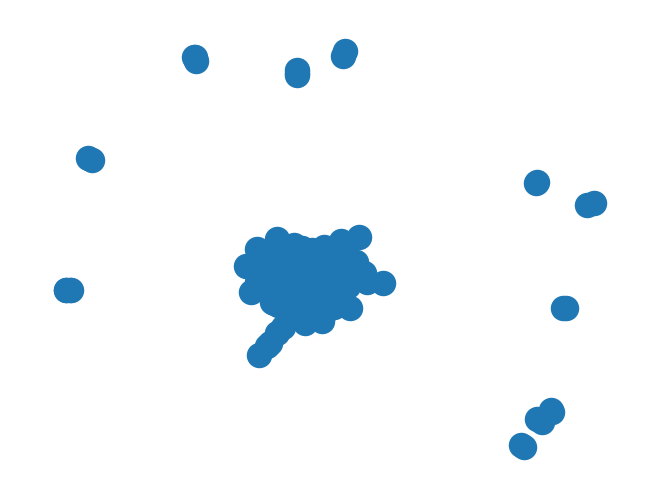

In [15]:
nx.draw(movie_graph)

In [16]:
import numpy as np
# Get degree distribution
degree_sequence = sorted([d for n, d in movie_graph.degree()], reverse=True)  # Sorted list of degrees
degree_count = np.bincount(degree_sequence)  # Count occurrences of each degree
degrees = np.arange(len(degree_count)) 

# Check for hubs in the network
max_degree = max(degree_sequence)
average_degree = np.mean(degree_sequence)
print("Maximum degree:", max_degree)
print("Average degree:", average_degree)

Maximum degree: 96
Average degree: 28.611964694344557


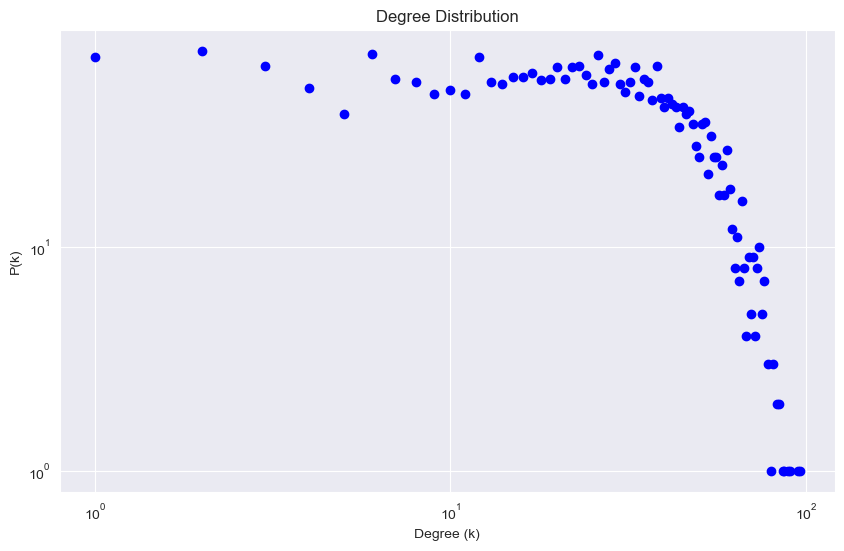

In [17]:
# Plot the degree distribution
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.loglog(degrees[degrees > 0], degree_count[degrees > 0], 'bo')  # Exclude zero degree entries
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution")
plt.show()

In [18]:
import powerlaw

# Fit the degree sequence to a power law
fit = powerlaw.Fit(degree_sequence)

# Check the power law exponent
print("Power law alpha:", fit.power_law.alpha)
print("xmin for power law fit:", fit.power_law.xmin)

# Compare power-law fit with other distributions
R, p = fit.distribution_compare('power_law', 'exponential')
print("Likelihood ratio R:", R)
print("p-value:", p)

# Interpretation: 
# - If R > 0 and p < 0.05, the power-law fit is significantly better than the exponential fit, 
#   suggesting the network is likely scale-free.


Power law alpha: 16.787447974207797
xmin for power law fit: 73.0
Likelihood ratio R: 0.49762683928294926
p-value: 0.1629866132676545


Calculating best minimal value for power law fit
/opt/anaconda3/envs/social_graphs/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [19]:
##Functions to calculate modularity
def dict_to_subgraphs(communities,G):
  """
  input: a dict of{community:node list} and a graph G
  output: a list of subgraphs where each subgraph is a community in G
  """
  subgraphs = []
  for key in communities.keys():
    nodes = communities[key]
    subgraph = G.subgraph(nodes)
    subgraphs.append(subgraph)
  return subgraphs

def modularity(subgraphs,G):
  """
  input: a list of subgraphs where each subgraph is a communities and the full graph
  output: modularity
  """
  L_c = [subgraph.number_of_edges() for subgraph in subgraphs]
  K_c = [sum([G.degree(node) for node in subgraph.nodes()]) for subgraph in subgraphs]
  M = sum([
    (L_c[i]/G.number_of_edges())-
    ((K_c[i]/(2*G.number_of_edges()))**2) for i in range(len(L_c))])
  return M

In [20]:
from community import community_louvain # Import the Louvain method from python-louvain

# Compute the best partition using Louvain
partition = community_louvain.best_partition(movie_graph)
    
value_to_keys = {} #Fliping the keys and values
for key, value in partition.items():
    if value not in value_to_keys:
        value_to_keys[value] = []
    value_to_keys[value].append(key)
    
print("Modularity based on louvain", modularity(dict_to_subgraphs(value_to_keys,movie_graph),movie_graph))

Modularity based on louvain 0.44678404332022154


In [21]:
print(degree_sequence)

[96, 95, 90, 89, 87, 86, 84, 84, 83, 83, 81, 81, 81, 80, 78, 78, 78, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72, 71, 71, 71, 71, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56,

In [22]:
len(list(movie_graph.nodes()))

3059

In [23]:
# Required libraries
import networkx as nx
import pandas as pd

initial_pos = {n: np.random.rand(2) for n in movie_graph.nodes}
pos = nx.spring_layout(movie_graph, k=2.0, iterations=50, pos=initial_pos)

# Node DataFrame, including 'actors' attribute
nodes_df = pd.DataFrame.from_dict(dict(movie_graph.nodes(data=True)), orient='index')
nodes_df['degree'] = [movie_graph.degree[node] for node in movie_graph.nodes]
nodes_df['x'] = [pos[node][0] for node in movie_graph.nodes]
nodes_df['y'] =  [pos[node][1] for node in movie_graph.nodes]

# Append reviews in nodes_df
grouped_reviews = merged_reviews.groupby('title')['reviewText'].apply(list).reset_index()
grouped_reviews = grouped_reviews.set_index('title')
nodes_df['reviews'] = [grouped_reviews.loc[title]['reviewText'] if title in grouped_reviews.index else None for title in nodes_df.index]
dropped_nodes = nodes_df[nodes_df['reviews'].isna()].index.tolist()
nodes_df = nodes_df.dropna(subset=['reviews'])

# Remove nodes without reviews from graph
movie_graph.remove_nodes_from(dropped_nodes)

# Edge DataFrame
edges_df = nx.to_pandas_edgelist(movie_graph)
edges_df['source'] = edges_df['source'].astype(str)
edges_df['target'] = edges_df['target'].astype(str)

# Make the plot in the visualisation undirected
edges_df['edge'] = edges_df.apply(lambda row: tuple(sorted([row['source'], row['target']])), axis=1)
undirected_edges_df = edges_df.drop_duplicates(subset='edge').drop(columns='edge').reset_index(drop=True)

# Replace non-numeric values with NaN and convert column to numeric
nodes_df['domestic'] = pd.to_numeric(nodes_df['domestic'], errors='coerce')
nodes_df['international'] = pd.to_numeric(nodes_df['international'], errors='coerce')

In [24]:
import graphistry

# Bind the nodes and edges to Graphistry, specifying the source, destination, and node key
# Set up Graphistry (replace with your credentials or use environment variables)
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", username="michalis", password="FDKeHQR4EQg7pvb")

graph = graphistry.bind(source="source", destination="target", point_x="x", point_y="y") \
                 .edges(undirected_edges_df) \
                 .nodes(nodes_df.reset_index(), node="index") \
                 .encode_point_size("degree") 

graph.plot()

Failed memoization speedup attempt due to Pandas internal hash function failing. Continuing without memoization speedups.This is fine, but for speedups around skipping re-uploads of previously seen tables, try identifying which columns have types that Pandas cannot hash, and convert them to hashable types like strings.Failed memoization speedup attempt due to Pandas internal hash function failing. Continuing without memoization speedups.This is fine, but for speedups around skipping re-uploads of previously seen tables, try identifying which columns have types that Pandas cannot hash, and convert them to hashable types like strings.

['Dances with Wolves',
 'The Godfather: Part III',
 'Boyz n the Hood',
 'The Naked Gun 2½: The Smell of Fear',
 'Nothing But Trouble',
 'Scenes from a Mall',
 'Sleeping with the Enemy',
 'The Twin Dragons',
 'Heaven & Earth',
 "Wayne's World 2",
 'Dumb and Dumber',
 "I'll Do Anything",
 'Interview with the Vampire: The Vampire Chronicles',
 'Rapa Nui',
 'Ri¢hie Ri¢h',
 'Spanking the Monkey',
 'Star Trek: Generations',
 'Tall Tale',
 'The Legend of Drunken Master',
 'Die Hard with a Vengeance',
 'Se7en',
 'Steal Big Steal Little',
 'Albino Alligator',
 'Beavis and Butt-Head Do America',
 'Alien: Resurrection',
 'Dream with the Fishes',
 'Hurricane Streets',
 'Mousehunt',
 'Monument Ave.',
 'Starship Troopers',
 'Living Out Loud',
 'Mafia!',
 'Mission: Impossible II',
 'Tea with Mussolini',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode II - Attack of the Clones',
 'Star Wars: Episode III - Revenge of the Sith',
 'Blast from the Past',
 "Hell's Kitchen",
 'Edtv',
 'Th

In [108]:
movie_graph.nodes['Analyze This']

{'movie_id': 'tt0122933',
 'release_year': 1999,
 'release_date': '5-3-1999',
 'run_time': '11111111111111111111111111111111111111111111111111111111111143',
 'distributor': 'Warner Bros.',
 'director': 'Harold Ramis',
 'writer': 'Kenneth Lonergan',
 'producer': 'Jane Rosenthal',
 'composer': 'Howard Shore',
 'cinematographer': 'Stuart Dryburgh',
 'actors': ['Robert De Niro',
  'Billy Crystal',
  'Lisa Kudrow',
  'Chazz Palminteri'],
 'budget': 80000000.0,
 'domestic': 106885658.0,
 'international': 70000000.0,
 'worldwide': 176885658.0,
 'genres': ['Comedy', 'Crime', 'UNKNOWN', 'UNKNOWN'],
 'link': 'https://www.boxofficemojo.com/title/tt0122933/credits/'}

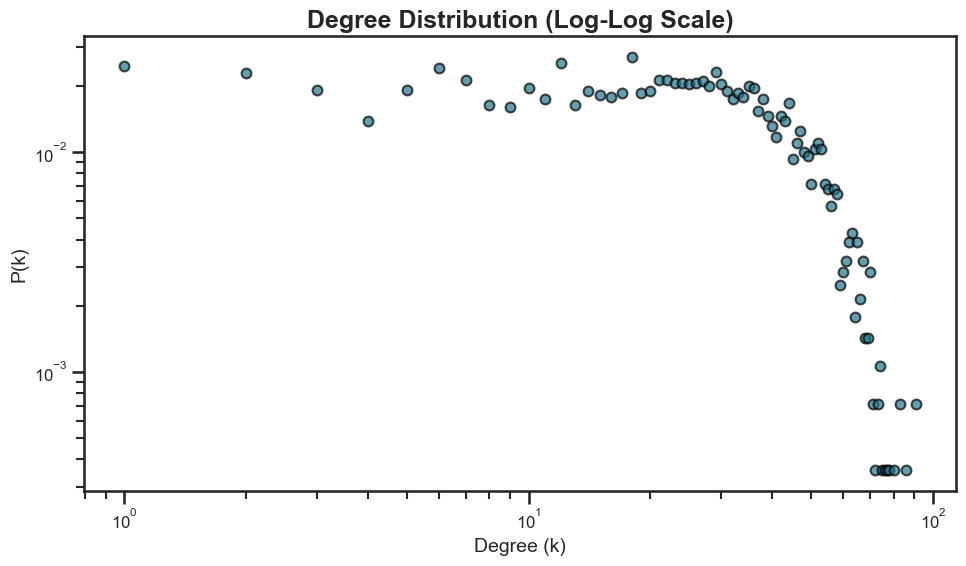

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_log_log_degree_dist(
    G, 
    filename="log_log_degree_distribution.png", 
    ref_alpha=None, 
    ref_xmin=None
):
    # Extract degrees of nodes
    degrees = [G.degree(n) for n in G.nodes()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    
    # Compute P(k) = counts / total number of nodes
    pk = counts / len(degrees)
    
    # Set up Seaborn style
    sns.set(style="ticks", context="talk")  # Use "ticks" style for minimal grid
    palette = sns.color_palette("crest", as_cmap=True)  # New colormap
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for P(k) vs k
    plt.scatter(
        unique_degrees, 
        pk, 
        color=palette(0.6),  # Pick a distinct color
        alpha=0.7, 
        s=50, 
        edgecolor="black", 
        label="Observed P(k)"
    )
    
    # Add a reference power-law line if specified
    if ref_alpha is not None and ref_xmin is not None:
        x_ref = np.array(sorted(unique_degrees[unique_degrees >= ref_xmin]))
        y_ref = (x_ref ** (-ref_alpha)) / np.sum(x_ref ** (-ref_alpha))
        plt.plot(
            x_ref, y_ref, 
            linestyle="--", color="red", linewidth=2, 
            label=f"Power-law fit (α={ref_alpha:.2f}, xmin={ref_xmin})"
        )
    
    # Add title and labels
    plt.title("Degree Distribution (Log-Log Scale)", fontsize=18, weight='bold')
    plt.xlabel("Degree (k)", fontsize=14)
    plt.ylabel("P(k)", fontsize=14)
    
    # Log-log scale
    plt.xscale("log")
    plt.yscale("log")
    
    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Save the plot to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=600, bbox_inches='tight')  # Save with high resolution
    
    # Show the plot
    plt.show()

plot_log_log_degree_dist(movie_graph)

In [25]:
degrees = [movie_graph.degree(n) for n in movie_graph.nodes()]


In [27]:
print(degrees)

[12, 61, 18, 31, 25, 14, 16, 10, 35, 20, 4, 41, 4, 24, 11, 3, 67, 7, 9, 2, 10, 1, 11, 1, 5, 6, 58, 7, 13, 40, 8, 6, 33, 7, 31, 14, 20, 5, 26, 11, 49, 23, 11, 31, 8, 2, 22, 31, 9, 15, 18, 18, 18, 21, 41, 32, 66, 6, 55, 45, 47, 44, 9, 16, 40, 29, 6, 1, 18, 41, 25, 24, 35, 15, 6, 1, 10, 29, 21, 27, 37, 28, 3, 4, 5, 29, 28, 30, 25, 19, 38, 49, 50, 1, 60, 25, 2, 32, 24, 7, 34, 26, 5, 21, 11, 35, 2, 35, 29, 27, 8, 46, 24, 45, 18, 48, 18, 18, 12, 11, 47, 3, 19, 44, 10, 45, 9, 3, 28, 41, 23, 80, 10, 7, 21, 35, 12, 29, 44, 6, 13, 36, 52, 9, 56, 15, 34, 62, 15, 26, 14, 28, 8, 9, 14, 33, 7, 20, 12, 10, 21, 25, 37, 3, 45, 36, 53, 30, 35, 35, 7, 1, 38, 13, 27, 27, 31, 17, 35, 31, 52, 15, 2, 44, 29, 24, 25, 21, 35, 27, 30, 1, 10, 37, 17, 44, 55, 17, 42, 38, 17, 55, 31, 34, 47, 19, 4, 24, 20, 10, 52, 29, 22, 4, 13, 25, 13, 37, 0, 7, 78, 14, 36, 12, 50, 7, 3, 65, 15, 51, 36, 60, 19, 19, 7, 42, 14, 35, 54, 10, 20, 32, 19, 6, 1, 32, 15, 39, 28, 45, 35, 40, 32, 19, 6, 14, 11, 48, 32, 48, 50, 44, 31, 9, 6

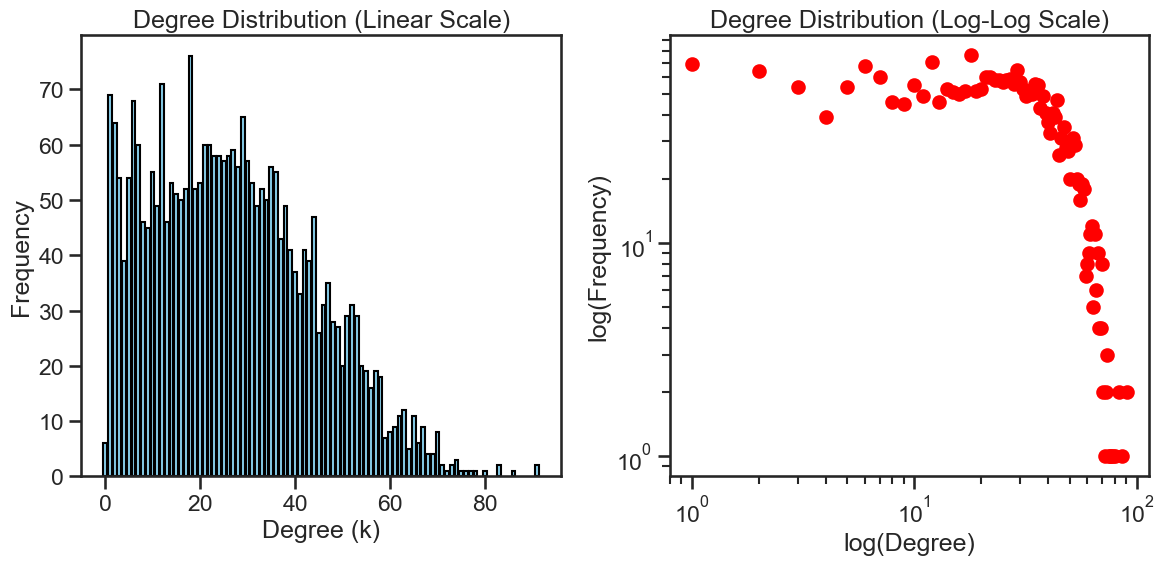

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/opt/anaconda3/envs/social_graphs/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


(14.108294576605937, 65.0)